In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import altair as alt # pacote para outros tipos de gráficos

# ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# AA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans

from google.colab import drive, files
import os
import matplotlib.cm as cm

pd.options.display.float_format = '{:.2f}'.format    # pandas: para todos os números aparecerem com duas casas decimais
np.set_printoptions(precision=2, suppress=True)      # numpy: para todos os números aparecerem com duas casas decimais

In [3]:
dados = pd.read_csv('https://patriciasiqueira.github.io/arquivos/prod-animal-2016.csv', index_col='estado')
dados.head()

,leite,ovos,mel
estado,,,
Rondônia,790947,17204,89981
Acre,56870,4647,4752
Amazonas,45978,51313,33310
Roraima,13141,4572,142800
Pará,577522,32596,523999


In [4]:
dados.shape

(27, 3)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   leite   27 non-null     int64
 1   ovos    27 non-null     int64
 2   mel     27 non-null     int64
dtypes: int64(3)
memory usage: 1.9+ KB


## PCA

In [7]:
X = dados.copy()

In [8]:
pca = PCA(random_state=1)
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R
# armazenar resultados dos componentes principais para gerar o diagrama de dispersão dos grupos
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1]}, index=X.index)

In [9]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[ 0.59,  0.52,  0.61],
       [-0.47,  0.84, -0.26],
       [-0.65, -0.14,  0.75]])

In [10]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([2.3 , 0.57, 0.25])

In [38]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 73.78,  92.1 , 100.  ])

## Análise de Agrupamento - *Hierárquicos*

### Vizinho + Próximo

In [11]:
# definir a distância de corte para todos os dendrogramas
max_d = 0

In [12]:
Z = linkage(X, method='single')
# method='single' (vizinho + próximo), 'complete' (vizinho + distante), 'average' (distância média), 'weighted '(also called WPGMA)
# 'centroid', 'median', 'ward'

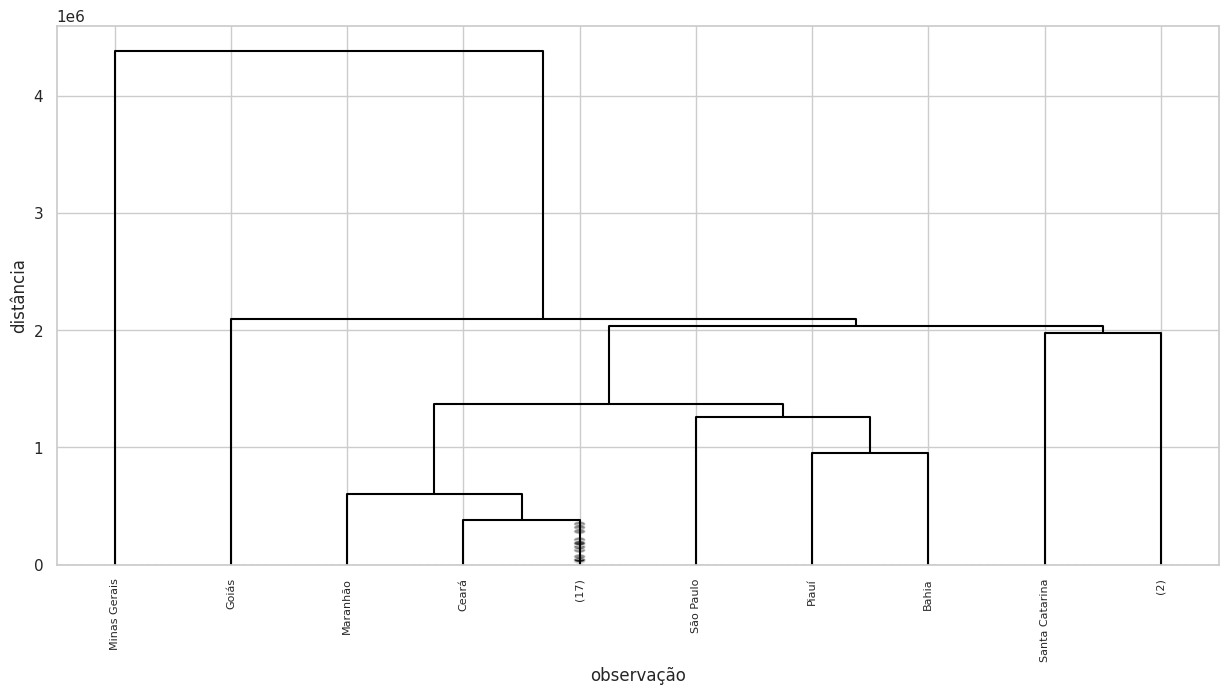

In [13]:
# dendrograma com mais opções
# mostra o ponto de corte na distância max_d
fig, ax = plt.subplots(figsize=(15, 7))
ax = dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar apenas os p últimos grupos formados
    p=10,  # quantos passos mostrar
    show_leaf_counts=True,  # mostrar quantas observações há em cada grupo entre parênteses
    leaf_rotation=90., # rotação
    leaf_font_size=8., # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
    show_contracted=True,  # to get a distribution impression in truncated branches,
    above_threshold_color='black',
    color_threshold=0.1, # para que todas as linhas sejam da mesma cor
    # color_threshold=max_d, # para que os grupos fiquem com cores diferentes
)
plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.xlabel('observação')
plt.ylabel('distância');

### Vizinho + Distante

In [15]:
# definir a distância de corte para todos os dendrogramas
max_d = 0

In [16]:
Z = linkage(X, method='complete')
# method='single' (vizinho + próximo), 'complete' (vizinho + distante), 'average' (distância média), 'weighted '(also called WPGMA)
# 'centroid', 'median', 'ward'

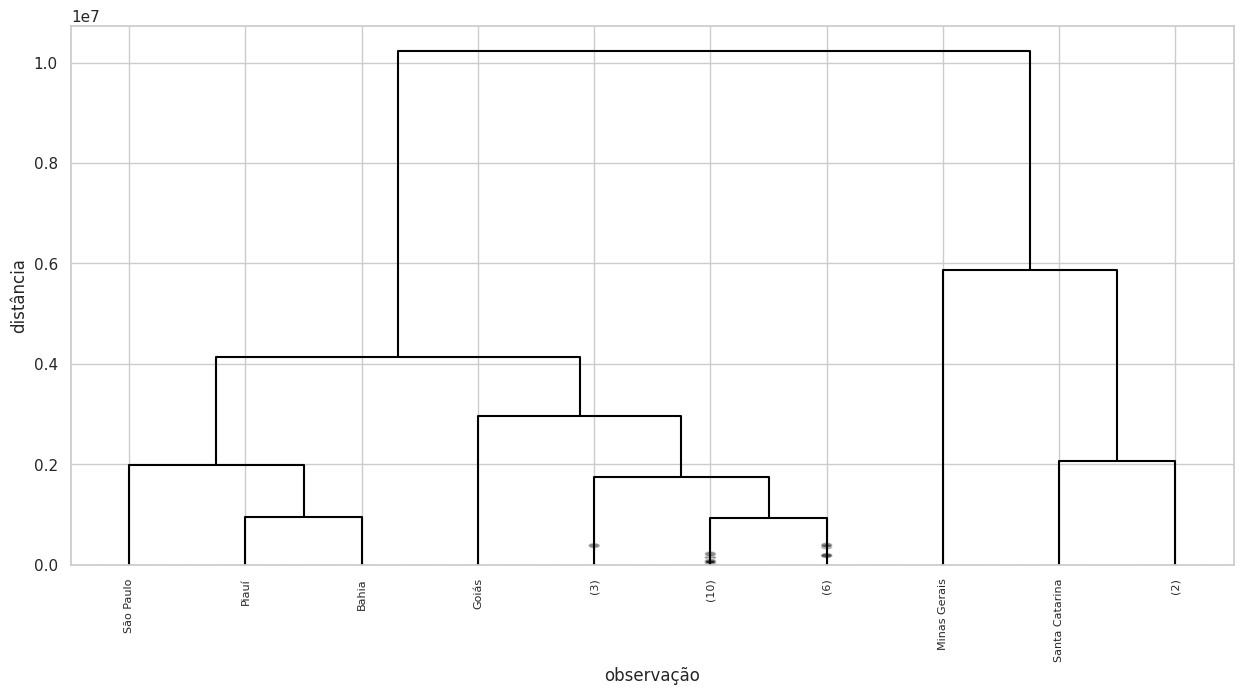

In [17]:
# dendrograma com mais opções
# mostra o ponto de corte na distância max_d
fig, ax = plt.subplots(figsize=(15, 7))
ax = dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar apenas os p últimos grupos formados
    p=10,  # quantos passos mostrar
    show_leaf_counts=True,  # mostrar quantas observações há em cada grupo entre parênteses
    leaf_rotation=90., # rotação
    leaf_font_size=8., # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
    show_contracted=True,  # to get a distribution impression in truncated branches,
    above_threshold_color='black',
    color_threshold=0.1, # para que todas as linhas sejam da mesma cor
    # color_threshold=max_d, # para que os grupos fiquem com cores diferentes
)
plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.xlabel('observação')
plt.ylabel('distância');

### Distância Média

In [18]:
# definir a distância de corte para todos os dendrogramas
max_d = 0

In [19]:
Z = linkage(X, method='average')
# method='single' (vizinho + próximo), 'complete' (vizinho + distante), 'average' (distância média), 'weighted '(also called WPGMA)
# 'centroid', 'median', 'ward'

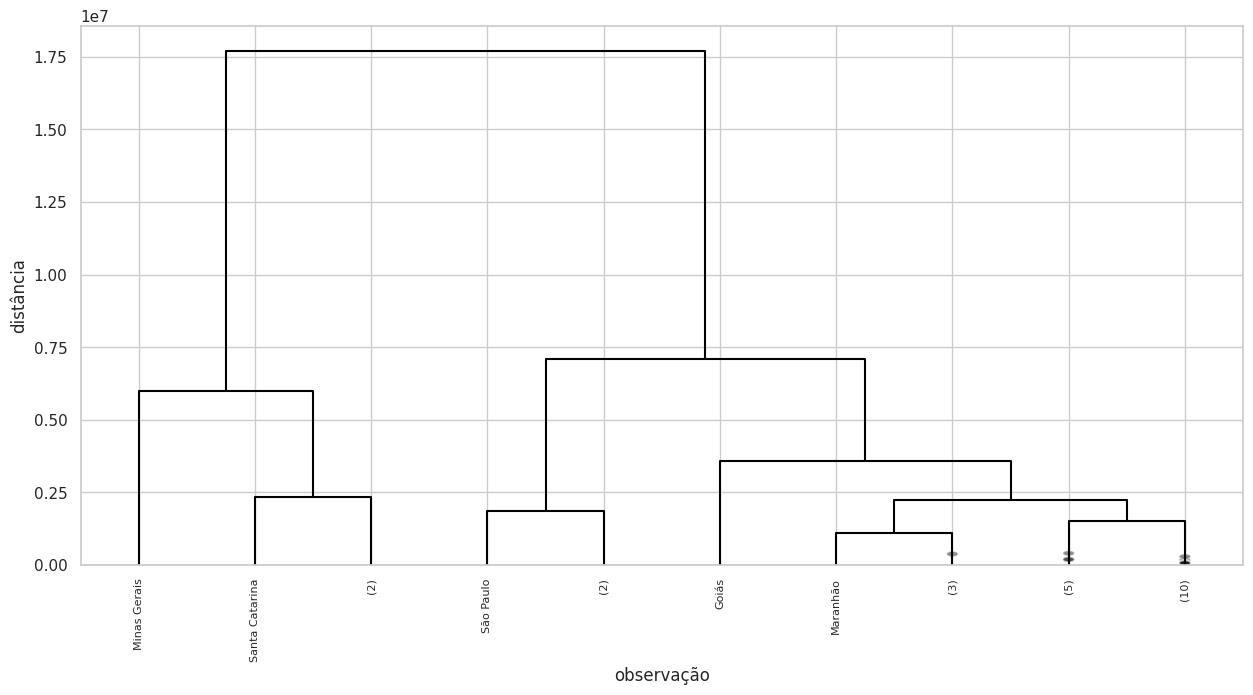

In [27]:
# dendrograma com mais opções
# mostra o ponto de corte na distância max_d
fig, ax = plt.subplots(figsize=(15, 7))
ax = dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar apenas os p últimos grupos formados
    p=10,  # quantos passos mostrar
    show_leaf_counts=True,  # mostrar quantas observações há em cada grupo entre parênteses
    leaf_rotation=90., # rotação
    leaf_font_size=8., # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
    show_contracted=True,  # to get a distribution impression in truncated branches,
    above_threshold_color='black',
    color_threshold=0.1, # para que todas as linhas sejam da mesma cor
    # color_threshold=max_d, # para que os grupos fiquem com cores diferentes
)
plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.xlabel('observação')
plt.ylabel('distância');

### Distância Média

In [21]:
# definir a distância de corte para todos os dendrogramas
max_d = 0

In [22]:
Z = linkage(X, method='centroid')
# method='single' (vizinho + próximo), 'complete' (vizinho + distante), 'average' (distância média), 'weighted '(also called WPGMA)
# 'centroid', 'median', 'ward'

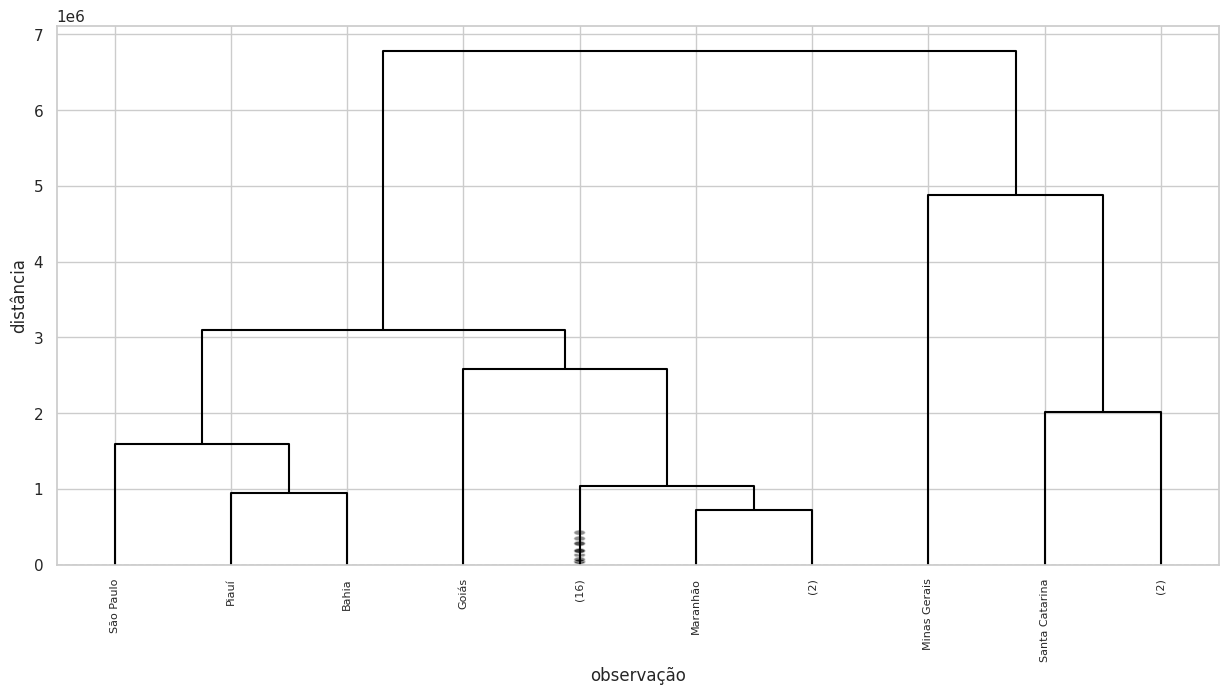

In [23]:
# dendrograma com mais opções
# mostra o ponto de corte na distância max_d
fig, ax = plt.subplots(figsize=(15, 7))
ax = dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar apenas os p últimos grupos formados
    p=10,  # quantos passos mostrar
    show_leaf_counts=True,  # mostrar quantas observações há em cada grupo entre parênteses
    leaf_rotation=90., # rotação
    leaf_font_size=8., # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
    show_contracted=True,  # to get a distribution impression in truncated branches,
    above_threshold_color='black',
    color_threshold=0.1, # para que todas as linhas sejam da mesma cor
    # color_threshold=max_d, # para que os grupos fiquem com cores diferentes
)
plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.xlabel('observação')
plt.ylabel('distância');

### Ward

In [24]:
# definir a distância de corte para todos os dendrogramas
max_d = 0

In [25]:
Z = linkage(X, method='ward')
# method='single' (vizinho + próximo), 'complete' (vizinho + distante), 'average' (distância média), 'weighted '(also called WPGMA)
# 'centroid', 'median', 'ward'

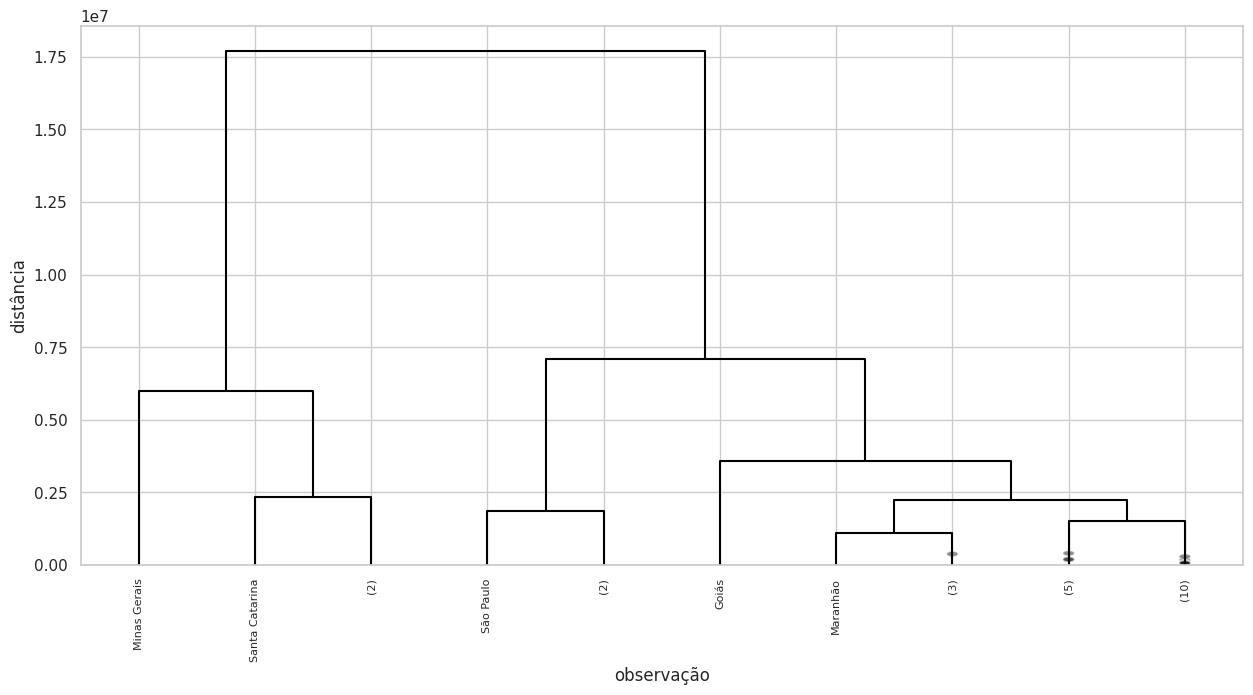

In [26]:
# dendrograma com mais opções
# mostra o ponto de corte na distância max_d
fig, ax = plt.subplots(figsize=(15, 7))
ax = dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar apenas os p últimos grupos formados
    p=10,  # quantos passos mostrar
    show_leaf_counts=True,  # mostrar quantas observações há em cada grupo entre parênteses
    leaf_rotation=90., # rotação
    leaf_font_size=8., # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
    show_contracted=True,  # to get a distribution impression in truncated branches,
    above_threshold_color='black',
    color_threshold=0.1, # para que todas as linhas sejam da mesma cor
    # color_threshold=max_d, # para que os grupos fiquem com cores diferentes
)
plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.xlabel('observação')
plt.ylabel('distância');

## K-Means

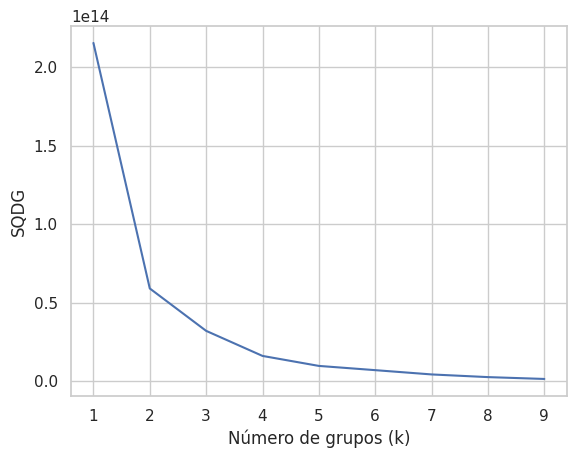

In [28]:
# SQDG
SQDG = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10).fit(X)
    dados['grupo'] = kmeans.labels_
    SQDG[k] = kmeans.inertia_ # Inertia: soma das distâncias das obs. ao centro mais próximo
plt.figure()
plt.plot(list(SQDG.keys()), list(SQDG.values()))
plt.xlabel('Número de grupos (k)')
plt.ylabel('SQDG');

In [29]:
# kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto').fit(X)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10).fit(X)

In [30]:
# incluir no resultado dos escores dos dois primeiros CPs a informação sobre os grupos obtidos
# com o método das k-médias
resultado['grupo'] = kmeans.labels_

In [31]:
# contagens
resultado.grupo.value_counts()

,count
grupo,
1,20
0,4
2,3


In [32]:
# incluir no dataframe de dados as informações sobre a qual grupo cada pessoa pertence
dados['grupo'] = kmeans.labels_

In [36]:
# média dos grupos - todas as variáveis
# inclusive as não utilizadas para agrupar
def formatar_numero(x):
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

dados.groupby('grupo').mean().map(formatar_numero)


,leite,ovos,mel
grupo,,,
0,"1.434.440,75","336.339,75","3.784.819,00"
1,"478.606,70","70.184,45","363.314,50"
2,"6.104.918,00","355.573,67","5.727.743,33"


In [37]:
# mediana das variáveis para cada grupo
dados.groupby('grupo').median().map(formatar_numero)

,leite,ovos,mel
grupo,,,
0,"1.275.238,00","152.094,00","3.611.104,00"
1,"364.566,00","33.865,50","180.265,00"
2,"4.730.195,00","365.023,00","5.992.965,00"


In [40]:
# kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto').fit(X)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10).fit(X)

In [41]:
# incluir no resultado dos escores dos dois primeiros CPs a informação sobre os grupos obtidos
# com o método das k-médias
resultado['grupo'] = kmeans.labels_

In [44]:
# contagens
resultado.grupo.value_counts()

,count
grupo,
0,20
3,3
2,3
1,1


In [42]:
# incluir no dataframe de dados as informações sobre a qual grupo cada pessoa pertence
dados['grupo'] = kmeans.labels_

In [43]:
# média dos grupos - todas as variáveis
# inclusive as não utilizadas para agrupar
def formatar_numero(x):
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

dados.groupby('grupo').mean().map(formatar_numero)

,leite,ovos,mel
grupo,,,
0,"478.606,70","70.184,45","363.314,50"
1,"8.970.779,00","365.023,00","4.906.589,00"
2,"4.152.581,33","310.386,00","5.714.969,67"
3,"874.664,67","371.966,33","3.423.669,33"
